[tantic 的数据特征工程](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)

[kaggle 参考链接](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook)

In [1]:
kaggle competitions download -c titanic

SyntaxError: invalid syntax (<ipython-input-1-aea886f2991f>, line 1)

从简单的单模型框架开始使用，到对更多的特征进行分析，到多模型的融合
一步步的完善，特征之间的关系需要多找找，通过特征与结果的关联找到其中的关系，通过结果的模型和各个特征关系找到其他的特征

[科学上网](http://www.kexueren.com.cn/8133.html)

[回归的分类](https://blog.csdn.net/lynnucas/article/details/47948639)

In [260]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
data_train = pd.read_csv('titanic_input/train.csv');
data_test = pd.read_csv('titanic_input/test.csv');

In [262]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [264]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


在pd中可以通过列名称的引用读取该列数据

In [265]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lindell, Mr. Edvard Bengtsson",male,347082,G6,S
freq,1,577,7,4,644


注意看下 describe 这个函数，其中的include参数是如何定义的

In [266]:
data_train.Age.mean()

29.69911764705882

In [267]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


通过因素和结果的对比，比较该因素对结果造成的影响  
__以此来判断是否该因素对结果有影响，如果没有影响，该特征的各个类型在结果表现上应该一致__

In [268]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [269]:
data_train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [270]:
data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [271]:
data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [272]:
data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


对某一列使用绘图的时候，该列中的一些情况自动分类，在根据各个类别的数量统计，得到柱状图的高度

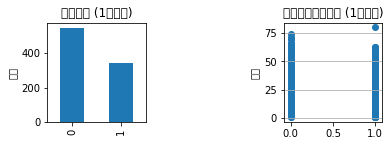

In [273]:
plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)") # puts a title on our graph
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)")


原来pclass已经分为了三类，按照是否幸存划分为两类，使用柱状体的stack功能，把两个相加起来

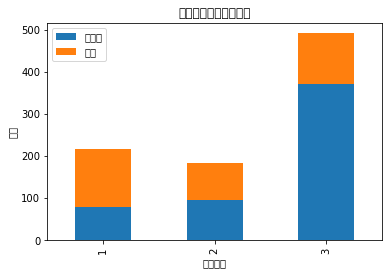

3    372
2     97
1     80
Name: Pclass, dtype: int64
   未获救   获救
1   80  136
2   97   87
3  372  119


In [274]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()
print(Survived_0)
print(df)

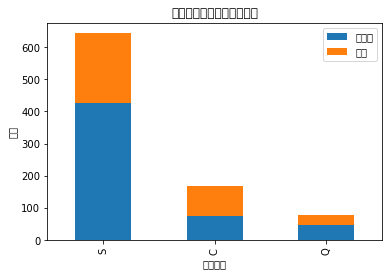

In [275]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

使用随机森林对缺少的年龄数据填充  
对连续的值进行分段切割，转化为几个类别，找到这几个类别之间的关系

In [276]:
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [277]:
data_train.loc[ data_train['Fare'] <= 8, 'Fare'] = 0
data_train.loc[(data_train['Fare'] > 8) & (data_train['Fare'] <= 14), 'Fare'] = 1
data_train.loc[(data_train['Fare'] > 14) & (data_train['Fare'] <= 31), 'Fare'] = 2
data_train.loc[(data_train['Fare'] > 31) & (data_train['Fare'] <= 58), 'Fare'] = 3
data_train.loc[ data_train['Fare'] > 58, 'Fare'] = 4
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,"[0, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.0,C85,C,"(31, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.0,C123,S,"(31, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.0,NaN,S,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1.0,NaN,Q,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.0,E46,S,"(31, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,2.0,NaN,S,"(14.454, 31]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,1.0,NaN,S,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,2.0,NaN,C,"(14.454, 31]"


In [278]:
data_test['FareBand'] = pd.qcut(data_test['Fare'], 4)
data_test.loc[ data_test['Fare'] <= 8, 'Fare'] = 0
data_test.loc[(data_test['Fare'] > 8) & (data_test['Fare'] <= 14), 'Fare'] = 1
data_test.loc[(data_test['Fare'] > 14) & (data_test['Fare'] <= 31), 'Fare'] = 2
data_test.loc[(data_test['Fare'] > 31) & (data_test['Fare'] <= 58), 'Fare'] = 3
data_test.loc[ data_test['Fare'] > 58, 'Fare'] = 4
data_test['Fare'] = data_test['Fare'].fillna("2")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,0,NaN,Q,"[0, 7.896]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,0,NaN,S,"[0, 7.896]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,1,NaN,Q,"(7.896, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,1,NaN,S,"(7.896, 14.454]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,1,NaN,S,"(7.896, 14.454]"


In [279]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FareBand       891 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 67.1+ KB


In [280]:
data_train2 = data_train
data_train.head()
data_train2['Sex'] = data_train2['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [281]:
data_test['Sex'] = data_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,0,NaN,Q,"[0, 7.896]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,0,NaN,S,"[0, 7.896]"
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,1,NaN,Q,"(7.896, 14.454]"
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,1,NaN,S,"(7.896, 14.454]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,1,NaN,S,"(7.896, 14.454]"
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,1,NaN,S,"(7.896, 14.454]"
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,0,NaN,Q,"[0, 7.896]"
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,2,NaN,S,"(14.454, 31.5]"
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,0,NaN,C,"[0, 7.896]"
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,2,NaN,S,"(14.454, 31.5]"


使用随机森林对缺失的值进行预测

In [282]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Sex', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df
data_train2.loc[(data_train2.Age.isnull()),'Age']
data_train2 = set_missing_ages(data_train2)
data_train2.loc[(data_train2.Age.isnull()),'Age']

Series([], Name: Age, dtype: float64)

In [283]:
data_test = set_missing_ages(data_test)

In [284]:
data_train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,0.0,NaN,S,"[0, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,4.0,C85,C,"(31, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,0.0,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,3.0,C123,S,"(31, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,1.0,NaN,S,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",0,29.185998,0,0,330877,1.0,NaN,Q,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,3.0,E46,S,"(31, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,2.0,NaN,S,"(14.454, 31]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,1.0,NaN,S,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,2.0,NaN,C,"(14.454, 31]"


__ 从下面可以看出，当特征值和结果的关联不是很明显的时候需要和其他的特征进行组合__  
要会使用这种数据按类切分的方法

In [285]:
data_train2['AgeBand'] = pd.cut(data_train2['Age'], 5)
data_train2[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.491071
1,"(16.336, 32.252]",0.344681
2,"(32.252, 48.168]",0.410480
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80]",0.090909


将上面的区间段进行对应到可计算的标签中

In [286]:

data_train2.loc[ data_train2['Age'] <= 16, 'Age'] = 0
data_train2.loc[(data_train2['Age'] > 16) & (data_train2['Age'] <= 32), 'Age'] = 1
data_train2.loc[(data_train2['Age'] > 32) & (data_train2['Age'] <= 48), 'Age'] = 2
data_train2.loc[(data_train2['Age'] > 48) & (data_train2['Age'] <= 64), 'Age'] = 3
data_train2.loc[ data_train2['Age'] > 64, 'Age']
data_train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,S,"[0, 7.91]","(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,4.0,C85,C,"(31, 512.329]","(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,"(7.91, 14.454]","(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,3.0,C123,S,"(31, 512.329]","(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,1.0,NaN,S,"(7.91, 14.454]","(32.252, 48.168]"
5,6,0,3,"Moran, Mr. James",0,1.0,0,0,330877,1.0,NaN,Q,"(7.91, 14.454]","(16.336, 32.252]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,3.0,E46,S,"(31, 512.329]","(48.168, 64.084]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,2.0,NaN,S,"(14.454, 31]","(0.34, 16.336]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,1.0,NaN,S,"(7.91, 14.454]","(16.336, 32.252]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,2.0,NaN,C,"(14.454, 31]","(0.34, 16.336]"


In [287]:
data_test.loc[ data_test['Age'] <= 16, 'Age'] = 0
data_test.loc[(data_test['Age'] > 16) & (data_test['Age'] <= 32), 'Age'] = 1
data_test.loc[(data_test['Age'] > 32) & (data_test['Age'] <= 48), 'Age'] = 2
data_test.loc[(data_test['Age'] > 48) & (data_test['Age'] <= 64), 'Age'] = 3
data_test.loc[ data_test['Age'] > 64, 'Age']
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
413,1305,3,"Spector, Mr. Woolf",0,1.0,0,0,A.5. 3236,1,NaN,S,"(7.896, 14.454]"
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,2.0,0,0,PC 17758,4,C105,C,"(31.5, 512.329]"
415,1307,3,"Saether, Mr. Simon Sivertsen",0,2.0,0,0,SOTON/O.Q. 3101262,0,NaN,S,"[0, 7.896]"
416,1308,3,"Ware, Mr. Frederick",0,1.0,0,0,359309,1,NaN,S,"(7.896, 14.454]"
417,1309,3,"Peter, Master. Michael J",0,0.0,1,1,2668,2,NaN,C,"(14.454, 31.5]"


In [288]:
data_train2['Age_Class'] = data_train2.Age *data_train2.Pclass
data_train2[['Age_Class', 'Survived']].groupby(['Age_Class'], as_index=False).mean().sort_values(by='Age_Class', ascending=True)

,Age_Class,Survived
0,0.0,0.491071
1,1.0,0.728814
2,2.0,0.530055
3,3.0,0.286486
4,4.0,0.433333
5,6.0,0.149425
6,9.0,0.111111
7,65.0,0.000000
8,70.0,0.000000
9,71.0,0.000000


In [289]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FareBand       891 non-null category
AgeBand        891 non-null category
Age_Class      891 non-null float64
dtypes: category(2), float64(3), int32(1), int64(5), object(4)
memory usage: 74.9+ KB


In [290]:
data_train2['Embarked'] = data_train2['Embarked'].fillna("S")
data_train2['Embarked'] = data_train2['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [291]:
data_test['Embarked'] = data_test['Embarked'].fillna("S")
data_test['Embarked'] = data_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [292]:
data_train2.drop(['PassengerId','Name','Ticket','Cabin','FareBand','AgeBand'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class
0,0,3,0,1.0,1,0,0.0,0,3.0
1,1,1,1,2.0,1,0,4.0,1,2.0
2,1,3,1,1.0,0,0,0.0,0,3.0
3,1,1,1,2.0,1,0,3.0,0,2.0
4,0,3,0,2.0,0,0,1.0,0,6.0
5,0,3,0,1.0,0,0,1.0,2,3.0
6,0,1,0,3.0,0,0,3.0,0,3.0
7,0,3,0,0.0,3,1,2.0,0,0.0
8,1,3,1,1.0,0,2,1.0,0,3.0
9,1,2,1,0.0,1,0,2.0,1,0.0


In [293]:
data_train2['Family'] = data_train2['SibSp'] + data_train2['Parch']+1

data_train2.loc[ data_train2['Family'] <= 1, 'Family'] = 0
data_train2.loc[ data_train2['Family'] > 1, 'Family'] = 1
data_train2[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Family', ascending=True)

,Family,Survived
0,0,0.303538
1,1,0.505650


In [294]:
data_train_rex = data_train2.drop(['PassengerId','Name','Ticket','Cabin','FareBand','AgeBand','SibSp','Parch'], axis=1)

In [295]:
data_test['Family'] = data_test['SibSp'] + data_test['Parch']+1

data_test.loc[ data_test['Family'] <= 1, 'Family'] = 0
data_test.loc[ data_test['Family'] > 1, 'Family'] = 1

data_test['Age_Class'] = data_test.Age *data_test.Pclass

data_test_reg = data_test.drop(['PassengerId','Name','Ticket','Cabin','FareBand','SibSp','Parch'], axis=1)
data_test_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass       418 non-null int64
Sex          418 non-null int32
Age          418 non-null float64
Fare         418 non-null object
Embarked     418 non-null int32
Family       418 non-null int64
Age_Class    418 non-null float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 18.0+ KB


In [296]:
data_train_rex.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_Class,Family
0,0,3,0,1.0,0.0,0,3.0,1
1,1,1,1,2.0,4.0,1,2.0,1
2,1,3,1,1.0,0.0,0,3.0,0
3,1,1,1,2.0,3.0,0,2.0,1
4,0,3,0,2.0,1.0,0,6.0,0


In [297]:
data_test_reg.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Age_Class
0,3,0,2.0,0,2,0,6.0
1,3,1,2.0,0,0,1,6.0
2,2,0,3.0,1,2,0,6.0
3,3,0,1.0,1,0,0,3.0
4,3,1,1.0,1,0,1,3.0


In [299]:
test_x = data_test_reg
test_x = test_x[['Pclass','Sex','Age','Fare','Embarked','Age_Class','Family']].as_matrix()
data_train_rex = data_train_rex.as_matrix()
train_y = data_train_rex[:,0]
train_x = data_train_rex[:,1:]
#print(train_y)

In [300]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

79.459999999999994

In [301]:
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)